Question 1-a: What are the major similarities and differences between the cost functions J(ω) and
J˜(ω)?

Both MSE & MAE cost functions are used to minimize the error between actual and predicted values.

Similarities: 
1) Lower the values indicates better performance in both the cost functions.
2) Both provides a single numeric value as an output variable.

Differences:
1) MSE follows a quadratic or squared error fashion, whereas MAE follows linear or absolute error fashion.
2) Firstly, MSE penalizes larger errors more heavily than smaller errors because of the squaring operation, which is more sensitive to outliers, whereas MAE treats all the errors equally.


Question 1-b:

If there are large values and the outliers are more, then we can choose MAE as it provides average absolute difference 
between actual and target values, whereas MSE can be chosen when there are less outliers with continuous values because it 
doubles the values which makes it worse.

Question 2-a:

Collinearity, also known as multicollinearity, is a statistical phenomenon in which one feature variable in a regression model is highly correlated with another feature variable. This can several issues:
    1)	The coefficient estimation tends to be unstable, which means they can undergo a significant change even when there is a         slight adjustment either to the data or the model.
    2)	As the estimated standard deviations of the coefficient estimates are larger than they should be, this makes it harder           to determine if the coefficients are statistically significant.
    3)	When the collinearity exists, it is challenging to give accurate coefficient interpretations.
    4)	It becomes more difficult to distinguish between the factors that are genuinely influencing the forecast and those that         are redundant.


Question 2-b:

There are some approaches to handle linear regression when collinearity is an issue:
    1)	Finding out which variables are truly important for the analysis, and which can be eliminated or combined. 
    2)	Creating new variables or transform variables which are non-correlated. 
    3)	Combining highly correlated variables into a single variable, might retain the relevant information.
    4)	Removing highly correlated variables based on the data analysis.
    5)	Using regularization models such as, Lasso and Ridge, helps adding penalties to the magnitude of coefficient estimates,         which forces some coefficients to shrink to zero.


Question 3:

Occam’s Razor is the problem-solving principle that recommends searching for explanations constructed with the smallest possible set of elements. Attributed to William of Ockham, a 14th-century English philosopher and theologian. It is frequently cited as “Entities must not be multiplied beyond necessity”, and the same principle is inaccurately paraphrased as “The simplest explanation is usually the best one”.
Occam’s Razor suggests that in Machine Learning, we should prefer simpler models with fewer coefficients over complex models like ensembles. It suggests complex models like ensembles will overfit the training dataset and perform poorly on new data.
Model Selection is the process of choosing one from among possibly many candidate machine learning models for a predictive modeling project.
Occam’s Razor is an approach to problem-solving and is commonly invoked to mean that if all else is equal, we should prefer the simpler solutions. 
Domingos defines the problem as two specific commonly asserted implications of Occam’s Razor in Applied Machine Learning, they are:
•	First Razor: Given two models with the same generalization error, the simpler one should be preferred because simplicity is desirable in itself.
•	Second Razor: Given two modes with the same training-set error, the simpler one should be preferred because it is likely to have lower generalization error.
The main objective of the Bias-Variance trade-off is to strike a balance between simplicity and complexity to build a simpler model which follows Occam’s Razor principle. The trade-off between consistency and correctness.
The term “Bias” describes a model’s tendency to underfit the data, leading to systematic errors. It tends to have higher bias and lower variance. Simpler models are biased because they are less flexible and may not capture complex relationships in the data.
The term “Variance” describes how sensitive a model is to subtle changes or noise in the data. More complex models have lower bias but higher variance. High variance can be seen in complex models, which may fit the noise in the data.


#References:

https://en.wikipedia.org/wiki/Occam%27s_razor
https://machinelearningmastery.com/ensemble-learning-and-occams-razor/#:~:text=Occam's%20razor%20is%20a%20heuristic,false%20and%20should%20be%20abandoned.
https://www.analyticsvidhya.com/blog/2021/03/intuitive-understanding-of-bias-and-variance-trade-off-%E2%9A%96%EF%B8%8F/


Question 4-a:

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/manis/OneDrive/Documents/DATA-602 - Data Analysis & ML/Assignment - 1/GateArrivalDelay.csv')
df.head()



,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,AverageGateArrivalDelay
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,4.70
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,14.73
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,11.38
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,7.08
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,4.09


In [21]:
# The column "Date_Time" is removed since it is a categorical variable and we can't include this in our analysis

df=df.drop(["Date_Time"], axis=1)

The most significant features for the target variable AverageGateArrivalDelay in descending order
AverageGateArrivalDelay         1.000000
AverageBlockDelay               0.782202
AverageAirborneDelay            0.645677
AverageAirportDepartureDelay    0.546711
AverageGateDepartureDelay       0.469346
AverageTaxiInDelay              0.342703
% On-TimeGateArrivals          -0.465051
Name: AverageGateArrivalDelay, dtype: float64


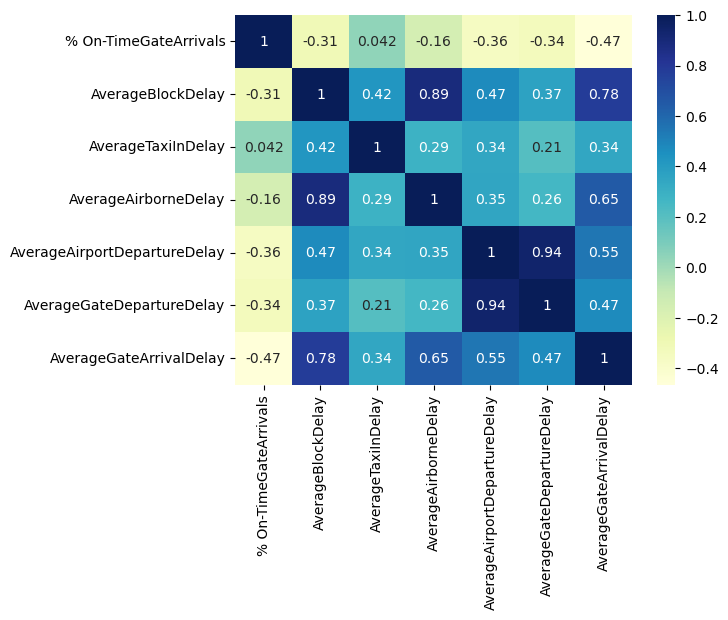

In [22]:
#print(df.corr())
corr_df = df.corr()
print("The most significant features for the target variable AverageGateArrivalDelay in descending order")
print(corr_df['AverageGateArrivalDelay'].sort_values(ascending=False))

# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
  
# displaying heatmap 
plt.show() 

# Reference : https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/#

In [23]:
# Calculate Spearman correlation coefficient between 'AverageGateArrivalDelay' and each feature

from scipy.stats import spearmanr    # For Spearman correlation

for col in df.columns[:-1]:
    rho, p = spearmanr(df[col].values, df['AverageGateArrivalDelay'].values)
    print('Spearman correlation between AverageGateArrivalDelay and %s is %s' %(col, round(rho,4)))

# Reference : Class Notes - Lecture-2

Spearman correlation between AverageGateArrivalDelay and % On-TimeGateArrivals is -0.6829
Spearman correlation between AverageGateArrivalDelay and AverageBlockDelay is 0.6079
Spearman correlation between AverageGateArrivalDelay and AverageTaxiInDelay is 0.2987
Spearman correlation between AverageGateArrivalDelay and AverageAirborneDelay is 0.3782
Spearman correlation between AverageGateArrivalDelay and AverageAirportDepartureDelay is 0.3987
Spearman correlation between AverageGateArrivalDelay and AverageGateDepartureDelay is 0.3704


After evaluating Spearman correlation coefficient it becomes clear that "% On-TimeGateArrivals" and "AverageBlockDelay" are the most significant features for the target variable "AverageGateArrivalDelay".

Question 4-b:

In [24]:
#Defining 'On-TimeGateArrivals' and 'AverageBlockDelay' as features and the target as numpy arrays

X = df[['% On-TimeGateArrivals','AverageBlockDelay']]
y = df[["AverageGateArrivalDelay"]]

In [25]:
# Dividing the features and the target variable into the train and test subsets
from sklearn.model_selection import train_test_split

# Splitting Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

X_train, X_test
#X_test


# Reference : Class Notes - Lecture-4

(      % On-TimeGateArrivals  AverageBlockDelay
 531                  100.00               0.35
 1031                  89.71               2.12
 1774                  88.16               4.43
 1116                  25.40              30.44
 603                  100.00               0.32
 ...                     ...                ...
 740                   92.11               4.22
 1032                  90.91               2.73
 2121                  85.71               0.71
 1424                  82.22               1.09
 1725                  83.65               4.11
 
 [1655 rows x 2 columns],
       % On-TimeGateArrivals  AverageBlockDelay
 1329                  92.98               2.64
 1180                  87.78               3.38
 492                  100.00               0.00
 124                  100.00               1.50
 626                   98.28               0.47
 ...                     ...                ...
 461                  100.00               0.71
 894        

Question 4-c:

In [26]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Instantiate
reg.fit(X_train, y_train) # Fit the train data
#r2_train_score = reg.score(X_train, y_train) # Calculating R^2 score for train
#print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)


Coefficients of Linear Model: [[-0.18925613  1.62790484]] 

Intercept: [18.64258081]


In [27]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)
#print(len(y_pred))
#y_pred[:10] # Representing the price prediction for the first 10 data points in␣test dataset
y_pred

# Reference : Class Notes - Lecture-2

array([[ 5.34321478e+00],
       [ 7.53199623e+00],
       [-2.83032029e-01],
       [ 2.15882524e+00],
       [ 8.07603789e-01],
       [ 1.00084923e+01],
       [ 1.20336016e+01],
       [ 1.08837909e+01],
       [ 3.14597312e+00],
       [ 5.40516389e+00],
       [ 1.91888703e+02],
       [-2.83032029e-01],
       [ 5.73219244e+00],
       [-2.83032029e-01],
       [ 2.84839601e+00],
       [ 4.86733725e+00],
       [ 9.86680705e+00],
       [ 5.51202906e+00],
       [ 2.51542002e+01],
       [ 6.97162369e+00],
       [ 5.98989802e+00],
       [ 4.90018926e+00],
       [ 3.05339649e+01],
       [ 9.25617999e+00],
       [ 3.91528829e+00],
       [ 2.35188720e+01],
       [ 2.03899782e+00],
       [ 7.83988079e+00],
       [ 3.52646035e+00],
       [ 1.94226525e+01],
       [ 1.27406943e+01],
       [ 8.51901638e+00],
       [ 4.15832035e+00],
       [ 1.42722763e+01],
       [ 8.80595368e+00],
       [ 1.05841098e+01],
       [ 9.40689132e+00],
       [ 3.73989813e+00],
       [ 4.7

Question 4-d:

In [28]:
r2_train_score = reg.score(X_train, y_train) # Calculating R^2 score for train, data
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')

# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test) # Calculating R^2 score for train 19
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Reference : Class Notes - Lecture-2

R^2 score for train dataset =  0.6488 

R^2 score for test dataset =  0.7108 



Question 4-e:

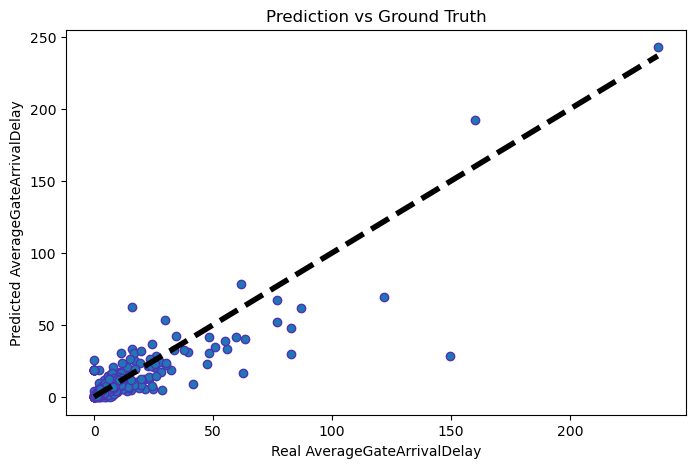

In [30]:
# Let's plot predictions vs ground truth for 'AverageGateArrivalDelay'

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7)) # Scatter plot for predictions vs truth

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4) # Draw line y=x

ax.set_xlabel('Real AverageGateArrivalDelay')
ax.set_ylabel('Predicted AverageGateArrivalDelay')

plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

# Reference : Class Notes - Lecture-2

Since  𝑅2 Score is around 0.64 we can say that 64% of variance is explained by the model.
Since the model is performing on both training and test datasets lousy,thus it is a underfit. 
This means that there is a low Variance and high bias

Question 4-f:

In [31]:
# Defining a function to calculate omega from X and Y
from numpy.linalg import inv # Import 'inv' to calculate inverse matrix

def exact_reg(X, Y):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)                  # Adding a column of 1's
    OmegaT = np.matmul(inv(np.matmul(X.T, X)), np.matmul(X.T, Y))     # Using the exact formula
    Y_hat = np.matmul(X, OmegaT)                                      # Predicted values of y
    return OmegaT, Y_hat


In [32]:
 # Let's compare the exact results for coefficients and intercept with the results of scikit-learn
    
print('The intercept and coefficients from exact formula:', exact_reg(X_train.values, y_train.values)[0],'\n')
print('The intercept and coefficients from scikit-learn:', np.insert(reg.coef_,0, reg.intercept_))


The intercept and coefficients from exact formula: [[18.64258081]
 [-0.18925613]
 [ 1.62790484]] 

The intercept and coefficients from scikit-learn: [18.64258081 -0.18925613  1.62790484]


In [33]:
# Calculate the exact R^2 scores

y_hat_train = exact_reg(X_train.values, y_train.values)[1]   # Calculating predictions for train data

y_hat_test = exact_reg(X_test.values, y_test.values)[1]      # Calculating predictions for test data

from sklearn.metrics import r2_score # Importing r2_score from metrics module

print('Exact train R^2 score = ', round(r2_score(y_train.values, y_hat_train), 6), '\n')
print('Exact test R^2 score = ', round(r2_score(y_test.values, y_hat_test), 6))

# Reference : Class Notes - Lecture-2

Exact train R^2 score =  0.648825 

Exact test R^2 score =  0.720086


Question 4g-(i):

In [34]:
# Renaming the features and calling them x1, x2, x3,...,x7

df.rename(columns={'AverageGateArrivalDelay':'x1','AverageBlockDelay':'x2','AverageAirborneDelay':'x3','AverageAirportDepartureDelay':'x4','AverageGateDepartureDelay':'x5','AverageTaxiInDelay':'x6','% On-TimeGateArrivals':'x7'},inplace=True)
#df.rename(columns={'AverageBlockDelay':'x1','AverageAirborneDelay':'x2','AverageAirportDepartureDelay':'x3','AverageGateDepartureDelay':'x4','AverageTaxiInDelay':'x5','% On-TimeGateArrivals':'x6'},inplace=True)
#tgt = 'AverageGateArrivalDelay'
df

,x7,x2,x6,x3,x4,x5,x1
0,90.00,7.70,9.47,0.60,13.67,6.67,4.70
1,72.73,0.91,2.55,0.00,13.17,5.33,14.73
2,75.00,1.00,0.91,0.00,25.50,14.00,11.38
3,83.33,1.50,1.13,3.00,26.75,17.50,7.08
4,90.91,0.64,1.38,1.27,15.00,12.50,4.09
...,...,...,...,...,...,...,...
2202,47.62,16.29,20.23,1.81,32.00,30.75,23.24
2203,47.06,10.29,8.49,3.00,71.17,64.67,25.71
2204,68.18,4.59,2.64,2.18,11.83,9.17,17.09
2205,59.09,2.55,3.04,2.14,25.75,23.00,15.00


N features construct N * (N - 1)/2 quadratic monomials

Question 4-g-(ii):

In [35]:
# df.drop(columns=['x6','x7'],inplace=True)
for i in df.columns:
  for j in df.columns:
    df[i+j]=df[i]*df[j] ## taking i and j columns and multiplying 
    #print(df[i+j])
    if i==j:
        break
df

,x7,x2,x6,x3,x4,x5,x1,x7x7,x2x7,x2x2,...,x5x3,x5x4,x5x5,x1x7,x1x2,x1x6,x1x3,x1x4,x1x5,x1x1
0,90.00,7.70,9.47,0.60,13.67,6.67,4.70,8100.0000,693.0000,59.2900,...,4.0020,91.1789,44.4889,423.0000,36.1900,44.5090,2.8200,64.2490,31.3490,22.0900
1,72.73,0.91,2.55,0.00,13.17,5.33,14.73,5289.6529,66.1843,0.8281,...,0.0000,70.1961,28.4089,1071.3129,13.4043,37.5615,0.0000,193.9941,78.5109,216.9729
2,75.00,1.00,0.91,0.00,25.50,14.00,11.38,5625.0000,75.0000,1.0000,...,0.0000,357.0000,196.0000,853.5000,11.3800,10.3558,0.0000,290.1900,159.3200,129.5044
3,83.33,1.50,1.13,3.00,26.75,17.50,7.08,6943.8889,124.9950,2.2500,...,52.5000,468.1250,306.2500,589.9764,10.6200,8.0004,21.2400,189.3900,123.9000,50.1264
4,90.91,0.64,1.38,1.27,15.00,12.50,4.09,8264.6281,58.1824,0.4096,...,15.8750,187.5000,156.2500,371.8219,2.6176,5.6442,5.1943,61.3500,51.1250,16.7281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,47.62,16.29,20.23,1.81,32.00,30.75,23.24,2267.6644,775.7298,265.3641,...,55.6575,984.0000,945.5625,1106.6888,378.5796,470.1452,42.0644,743.6800,714.6300,540.0976
2203,47.06,10.29,8.49,3.00,71.17,64.67,25.71,2214.6436,484.2474,105.8841,...,194.0100,4602.5639,4182.2089,1209.9126,264.5559,218.2779,77.1300,1829.7807,1662.6657,661.0041
2204,68.18,4.59,2.64,2.18,11.83,9.17,17.09,4648.5124,312.9462,21.0681,...,19.9906,108.4811,84.0889,1165.1962,78.4431,45.1176,37.2562,202.1747,156.7153,292.0681
2205,59.09,2.55,3.04,2.14,25.75,23.00,15.00,3491.6281,150.6795,6.5025,...,49.2200,592.2500,529.0000,886.3500,38.2500,45.6000,32.1000,386.2500,345.0000,225.0000


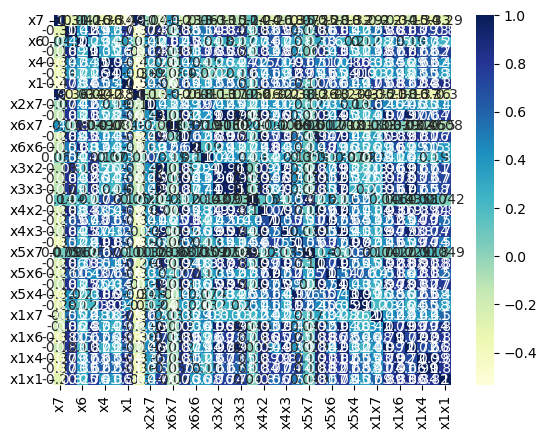

In [36]:
# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
  
# displaying heatmap 
plt.show() 

# Reference : https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/#

Question 4-g-(iii),(iv),(v):

In [39]:
r2_train_score = reg.score(X_train, y_train) # Calculating R^2 score for train, data
print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')

# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test) # Calculating R^2 score for train 19
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Reference : Class Notes - Lecture-2

R^2 score for train dataset =  0.6488 

R^2 score for test dataset =  0.7108 



In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

##Create the quadratic monomials
poly = PolynomialFeatures(2, include_bias=True)
X_train_quad = poly.fit_transform(X_train)
X_test_quad = poly.transform(X_test)

# Fitting model 
quad_reg = LinearRegression().fit(X_train_quad, y_train)


y_train_pred = quad_reg.predict(X_train_quad) # predicting terget values
y_test_pred = quad_reg.predict(X_test_quad) # predicting terget values

In [41]:
#R2 scores for train and test
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2-score for train quad set:', r2_train) # calculating R2 scores of quadratic monomial
print('R2-score for test quad set:', r2_test) # calculating R2 scores of quadratic monomial

# Reference : Class Notes - Lecture-2

R2-score for train quad set: 0.7184170916350093
R2-score for test quad set: 0.7901415017389712


In [42]:
 # Calculating the train and test accuracy scores of the model

#train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy
#test_score = metrics.accuracy_score(y_test, y_test_pred) # test accuracy
#print('Train accuracy score of the model is ', round(train_score, 5),'\n')
#print('Test accuracy score of the model is ', round(test_score, 5))

# Reference : Class Notes - Lecture-2

Question 5-a:

           x         y
0   0.938777  1.766601
1   3.742408 -1.143953
2   3.753170 -1.181728
3   1.590705  0.975570
4   1.664196  0.711661
..       ...       ...
95  2.206132 -0.527001
96  1.283896  1.530117
97  1.783070  0.542672
98  4.261054 -0.031737
99  2.864206 -1.973660

[100 rows x 2 columns]


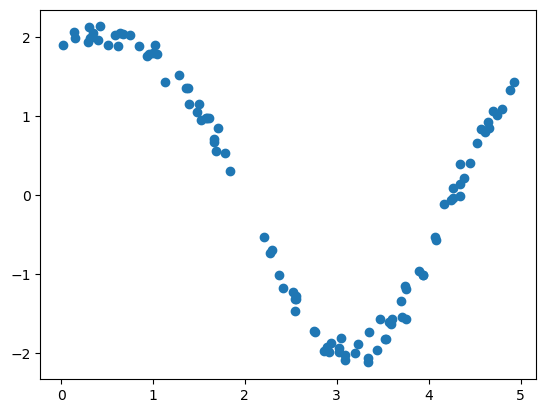

In [112]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Define the function f(x)
def f(x):
    return np.sin(x)**2 + 2*np.cos(x)
n = 100
# Generate random values of x from the interval 0 to 5
x = np.random.uniform(0, 5, n)
# Addding noice
noise = np.random.normal(0, 0.1, n)
y = f(x) + noise
# Creating a dataframe and recording the values into it
df = pd.DataFrame({'x': x, 'y': y})
print(df)
plt.scatter(x,y)
plt.show()

Question : 5-b

In [135]:
 # We now need to construct powers of 'x' to be able to perform polynomial regression

power_col = ['x^%d' %(i) for i in range(2, 14)] # Create name for the power columns
for col in power_col:
    power = int(col.split('^')[1]) # Extract 'power'
    df[col] = df['x']**power # Construct the column 'x^power'
df1 = df[['x'] + power_col + ['y']] # Change the order of columns (put 'y' at the end)

df1 # Display dataframe

# Reference : Class Notes - Lecture-3

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,y
0,0.938777,0.881302,0.827346,0.776694,0.729142,0.684502,0.642595,0.603253,0.566320,5.316486e-01,4.990996e-01,4.685432e-01,4.398576e-01,1.766601
1,3.742408,14.005620,52.414749,196.157393,734.101058,2747.305910,10281.540495,38477.722699,143999.349589,5.389044e+05,2.016800e+06,7.547690e+06,2.824654e+07,-1.143953
2,3.753170,14.086284,52.868216,198.423393,744.716695,2795.048241,10490.290766,39371.842938,147769.213551,5.546030e+05,2.081519e+06,7.812295e+06,2.932087e+07,-1.181728
3,1.590705,2.530341,4.025026,6.402628,10.184690,16.200834,25.770743,40.993642,65.208779,1.037279e+02,1.650005e+02,2.624670e+02,4.175075e+02,0.975570
4,1.664196,2.769550,4.609075,7.670405,12.765061,21.243568,35.353469,58.835116,97.913189,1.629468e+02,2.711754e+02,4.512892e+02,7.510338e+02,0.711661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.206132,4.867019,10.737288,23.687876,52.258585,115.289347,254.343539,561.115466,1237.894888,2.730960e+03,6.024858e+03,1.329163e+04,2.932310e+04,-0.527001
96,1.283896,1.648389,2.116361,2.717187,3.488586,4.478982,5.750548,7.383106,9.479141,1.217023e+01,1.562531e+01,2.006128e+01,2.575660e+01,1.530117
97,1.783070,3.179338,5.668981,10.108189,18.023605,32.137346,57.303129,102.175476,182.186001,3.248503e+02,5.792308e+02,1.032809e+03,1.841570e+03,0.542672
98,4.261054,18.156584,77.366190,329.661538,1404.705719,5985.527365,25504.657205,108676.729634,463077.447735,1.973198e+06,8.407905e+06,3.582654e+07,1.526588e+08,-0.031737


Question : 5-c

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df[['x', 'x^2', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'x^8', 'x^9', 'x^10',
       'x^11', 'x^12', 'x^13']], df['y'], test_size=0.25, random_state=0)
poly_regression = LinearRegression()
poly_regression.fit(X_train, y_train)
poly_coefficients = poly_regression.coef_
poly_coefficients

array([ 2.15126949e+00, -1.31469194e+01,  4.48780288e+01, -9.04683025e+01,
        1.12787075e+02, -9.23082230e+01,  5.13576318e+01, -1.97777286e+01,
        5.28294576e+00, -9.62183602e-01,  1.14116832e-01, -7.95035916e-03,
        2.46933914e-04])

In [139]:
from sklearn.linear_model import LinearRegression # Import 'LinearRegression' from sklearn
def do_linear_reg(df1, power): # Defining a function to do polynomial regression on 'df'
    cols = ['x']
    if power > 1:
        cols += ['x^%d' %(j) for j in range(2, power+1)] # Considering colmuns up to 'power'+1
    X = df1[cols].values # Features of regression
    y = df1['y'].values # Target of regression
    lin_reg = LinearRegression() # Instantiate 'LinearRegression'
    lin_reg.fit(X, y) # Fit the data
    r2_score = lin_reg.score(X, y) # Calculate R^2 score
    coefs = lin_reg.coef_ # Calculate the coefficients/weights of regression
    intercept = lin_reg.intercept_ # Calculate the intercept/bias term
    y_pred = lin_reg.predict(X) # Predict the target
    df1['yhat'] = y_pred # Add prediction to 'df'
    plt.plot(df1['x'], df1['yhat'], color='green') # Plot the prediction
    plt.plot(df1['x'], df1['y'], '.', color='crimson') # Plot the truth target
    plt.gcf().set_size_inches(8, 5)
    plt.show()
    return r2_score, coefs, intercept # Spit out R^2-score, weights, bias term

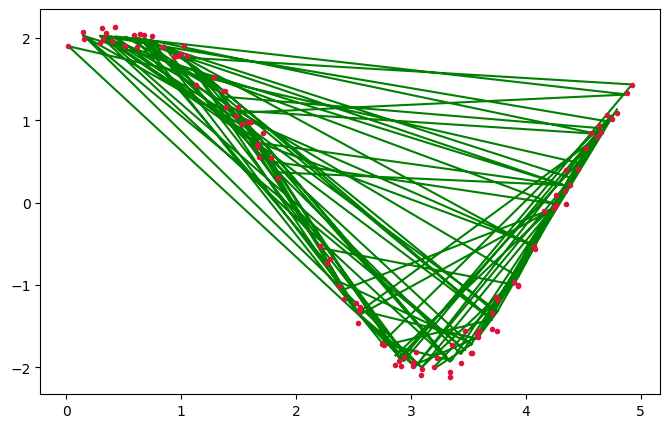

R^2 score=  0.995622607752922
coefficients=  [ 2.86257168e+00 -1.74647179e+01  5.39980605e+01 -9.66239423e+01
  1.07719630e+02 -7.98009528e+01  4.06894986e+01 -1.45215851e+01
  3.63153528e+00 -6.25203882e-01  7.07426545e-02 -4.74395887e-03
  1.43017420e-04]
Intercept=  1.8552612236390478


In [140]:
# Perform regression up to power 13

r2,coe,inte=do_linear_reg(df1, 13)
print("R^2 score= ",r2)
print("coefficients= ",coe)
print("Intercept= ",inte)

# Reference : Class Notes - Lecture-3

Question : 5-d

In [117]:
from sklearn.linear_model import Ridge # Import 'Ridge' from sklearn
# Defining a function to do Ridge polynomial regression on 'df' with penalty factor 'a'
def do_ridge_reg(df1, power, a):
    cols = ['x']
    if power > 1:
        cols += ['x^%d' %(j) for j in range(2, power+1)] # Considering colmuns up to 'power'+1
    X = df1[cols].values # Features of regression
    y = df1['y'].values # Target of regression
    ridge = Ridge(alpha=a, max_iter=100000) # Instantiate Ridge regression with penalty strength 'a'
    ridge.fit(X, y) # Fit the data
    r2_score = ridge.score(X, y) # Calculate R^2 score
    coefs = ridge.coef_ # Calculate the coefficients/weights of regression
    intercept = ridge.intercept_ # Calculate the intercept/bias term
    y_pred = ridge.predict(X) # Predict the target
    df1['yhat'] = y_pred # Add prediction to 'df'
    plt.plot(df1['x'], df1['yhat'], color='green') # Plot the prediction
    plt.plot(df1['x'], df1['y'], '.', color='crimson') # Plot the truth target
    plt.gcf().set_size_inches(8, 5)
    plt.show()
    return r2_score, coefs, intercept # Spit out R^2-score, weights, bias term

# Reference : Class Notes - Lecture-3

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.1673e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


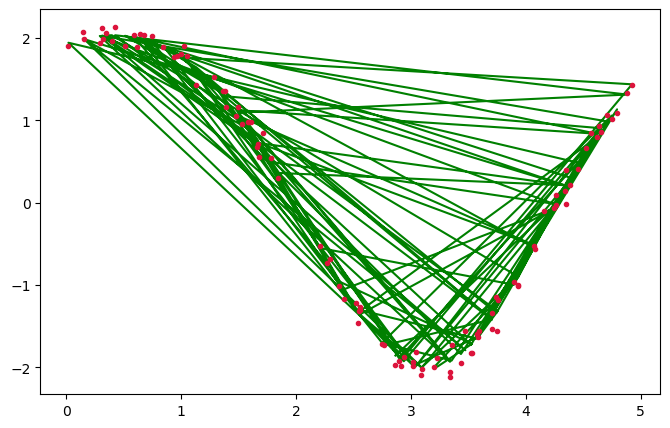

R^2 score=  0.9955946802026293
coefficients=  [ 4.78536032e-01 -5.70034139e-01  1.20764471e-02 -8.37004607e-03
 -1.37190093e-01  3.21364730e-03  1.94785000e-01 -2.09208654e-01
  1.11018638e-01 -3.41531486e-02  6.15350470e-03 -6.02808571e-04
  2.48201426e-05]
Intercept=  1.9360734348238684


In [118]:
# Perform Ridge regression up to power 13 with penalty 200

r2,coe,inte=do_ridge_reg(df1, 13, 0.001)
print("R^2 score= ",r2)
print("coefficients= ",coe)
print("Intercept= ",inte)

# Reference : Class Notes - Lecture-3

Question : 5-e

In [144]:
from sklearn.linear_model import Lasso # Import 'Lasso' from sklearn
import matplotlib.pyplot as plt
import pandas as pd

# Defining a function to do Lasso polynomial regression on 'df' with penalty factor 'a'
def do_lasso_reg(df1, power, a):
    cols = ['x']
    if power > 1:
        cols += ['x^%d' %(j) for j in range(2, power+1)] # Considering colmuns up to 'power'+1
    X = df1[cols].values # Features of regression
    y = df1['y'].values # Target of regression
    # Instantiate Lasso regression with penalty strength 'a'
    lasso = Lasso(alpha=a, max_iter=100000, tol=1e-4)
    lasso.fit(X, y) # Fit the data
    r2_score = lasso.score(X, y) # Calculate R^2 score
    coefs = lasso.coef_ # Calculate the coefficients/weights of regression
    intercept = lasso.intercept_ # Calculate the intercept/bias term
    y_pred = lasso.predict(X) # Predict the target
    df1['yhat'] = y_pred # Add prediction to 'df'
    plt.plot(df1['x'], df1['yhat'], color='green') # Plot the prediction
    plt.plot(df1['x'], df1['y'], '.', color='crimson') # Plot the truth target
    plt.gcf().set_size_inches(8, 5)
    plt.show()
    return r2_score, coefs, intercept # Spit out R^2-score, weights, bias term


C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.763e-01, tolerance: 2.148e-02
  model = cd_fast.enet_coordinate_descent(


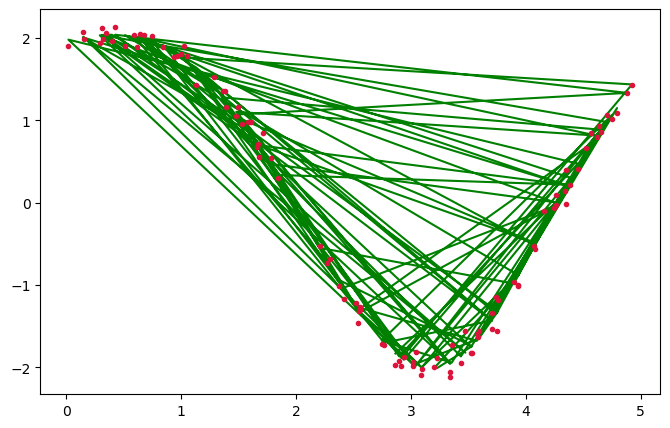

R^2 score=  0.9954184244672548
coefficients=  [ 2.38270299e-01  0.00000000e+00 -5.17349749e-01  6.92459464e-02
  1.54990472e-02  1.07913061e-03 -9.74138745e-05 -5.09616600e-05
 -1.09933075e-05 -1.61699456e-06 -1.19294928e-07  2.55624059e-08
  1.55280634e-08]
Intercept=  1.9775952675522572


In [145]:
# Perform Lasso regression up to power 13 with penalty 0.001
r2,coe,inte=do_lasso_reg(df1, 13, 0.001)
print("R^2 score= ",r2)
print("coefficients= ",coe)
print("Intercept= ",inte)

# Reference : Class Notes - Lecture-3

The coefficients of part e is different from both part c and d.

Penalty factor is set to 0.001 and atleast one of the coefficients is zero. This is why lasso regression is taken for feature selection

Question 5-f:

In [143]:
significant_monomials = [f'x^{i+1}' for i, coef in enumerate(coe) if abs(coef) > 0]
print(significant_monomials)


['x^1', 'x^3', 'x^4', 'x^5', 'x^6', 'x^7', 'x^8', 'x^9', 'x^10', 'x^11', 'x^12', 'x^13']


In [90]:
'''import math

x = 0
li=[]
for i in range(14):
    #e_to_2 += x**i/math.factorial(i)
    e=(np.sin(x**i)*np.sin(x**i)+2*np.cos(x**i)+ np.random.normal(0, 0.3))/math.factorial(i)
    li.append(e)

#print(len(li))
print(li)
'''



'import math\n\nx = 0\nli=[]\nfor i in range(14):\n    #e_to_2 += x**i/math.factorial(i)\n    e=(np.sin(x**i)*np.sin(x**i)+2*np.cos(x**i)+ np.random.normal(0, 0.3))/math.factorial(i)\n    li.append(e)\n\n#print(len(li))\nprint(li)\n'

Question 5-g:

In [128]:
import sympy as sp

# Define the variable and function
x = sp.symbols('x')
f = sp.sin(x)**2 + 2*sp.cos(x)

# Calculating the derivatives and solve them at x = 0
taylor_coef = []
for i in range(14):
    coef = f.diff(x, i).subs(x, 0) / sp.factorial(i)
    taylor_coef.append(coef)

# Displaying the Taylor expansion coefficients
for i, coef in enumerate(taylor_coef):
    print(f'Taylor Coefficient {i}: {coef}')


Taylor Coefficient 0: 2
Taylor Coefficient 1: 0
Taylor Coefficient 2: 0
Taylor Coefficient 3: 0
Taylor Coefficient 4: -1/4
Taylor Coefficient 5: 0
Taylor Coefficient 6: 1/24
Taylor Coefficient 7: 0
Taylor Coefficient 8: -1/320
Taylor Coefficient 9: 0
Taylor Coefficient 10: 17/120960
Taylor Coefficient 11: 0
Taylor Coefficient 12: -31/7257600
Taylor Coefficient 13: 0


Comparing f and g, we see the values are different.

Question : 6(a)

Conceptual Reason:
    One conceptual reason for why the precise formula for solving the linear regression problem with 
    the Mean Squared Error (MSE) cost function is not frequently employed in practice is that it might not 
    be computationally efficient, especially when working with a large number of features or data points. 
    Inverting a big matrix can be computationally expensive and numerically unstable, but it is necessary to determine 
    the inverse of a matrix in order to reach the precise solution. Large-scale tasks may find it less useful because of 
    the potential for numerical problems and slower execution times.

Practical Reason:
    The practical reason for not using the exact formula in practice is that it struggles to handle noisy or unclean data. 
    The precise solution may depend on outliers and noise in the dataset because real-world data frequently contains noise. 
    High dimensionality or multicollinearity (correlations between characteristics) in the data may lead to overfitting. 
    Modern machine learning frameworks like scikit-learn (sklearn), which can handle noisy data and big feature sets more 
    successfully, use more robust and generalizable algorithms, like QR decomposition or gradient descent, 
    to overcome these practical issues. These techniques include regularization options to avoid overfitting and 
    are more appropriate for use in real-world circumstances.

Question : 6(b)

The optimal values of parameters ω = (ω0, ω1, · · · , ωd) are found using the QR-decomposition by following the below steps:
    Step-1: Start from the linear regression equation Y^ = X · ω^T.
    Step-2: Using the QR-decomposition, divide A into Q and R, where Q is orthogonal and R is upper triangular.
    Step-3: Pre-multiply both sides by Q^T : Q^T Y^ = R {w}^T.
    Step-4: Find {w}^T : {w}^T = R^{-1} (Q^T Y^)
    Step-5: Lastly, Transpose to get w : w = (R^{-1} (Q^T Y^))^T
        
        
#Reference: https://zief0002.github.io/matrix-algebra/qr-decompostion.html

Question : 6(c)

In [56]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

data=pd.read_csv(r"C:\Users\manis\OneDrive\Documents\DATA-602 - Data Analysis & ML\Assignment - 1\GateArrivalDelay.csv")
x=data[["% On-TimeGateArrivals","AverageBlockDelay"]] # Features 
y=data[["AverageGateArrivalDelay"]] # Target Variable


X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
Q, R = np.linalg.qr(X_train)
dec = np.dot(np.linalg.inv(R), np.dot(Q.T, y_train))
dec

array([[0.00287247],
       [2.24542196]])

Question - 6(d)

In [57]:
y_pred = np.dot(X_test, dec)
r2_train = r2_score(y_train, np.dot(X_train, dec))
r2_test = r2_score(y_test, y_pred)
print("Coefficients:", dec)
print("R2-score (Train):", r2_train)
print("R2-score (Test):", r2_test)

Coefficients: [[0.00287247]
 [2.24542196]]
R2-score (Train): 0.5883307806698055
R2-score (Test): 0.5375684750349152


Question 6-e:

Advantages of QR Decomposition for Linear Regression:
    1. Enhanced Numerical Stability
    2. Orthogonal Matrix Simplification
    3. Improved Condition Handling
    4. Reduced Risk of Overfitting

Disadvantages of QR Decomposition for Linear Regression:
    1. High Memory Consumption
    2. Challenges with Rank-Deficient Data
    3. Limited Feature Selection
    4. Less Interpretability